#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [2]:
dataset = pd.read_csv('Placement.csv')
dataset.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


#### Checking the columns with normal ditribution to apply Z-score outlier detection

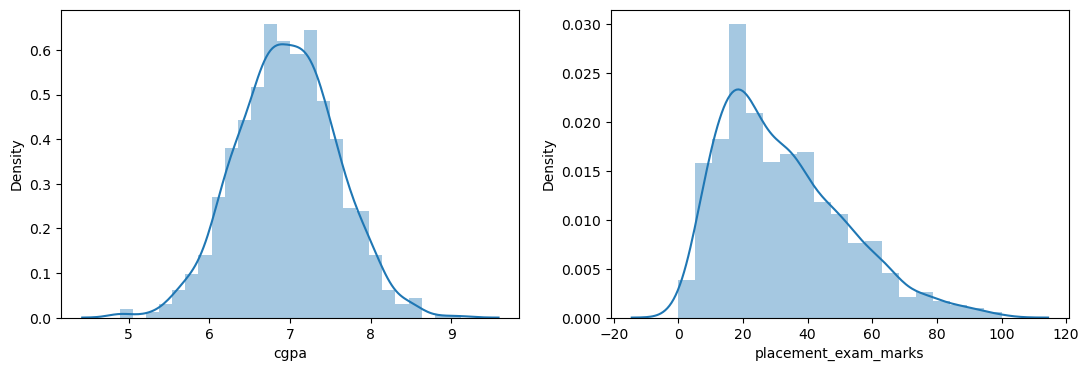

In [3]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(dataset['cgpa'])

plt.subplot(1,2,2)
sns.distplot(dataset['placement_exam_marks'])

plt.show()

In [4]:
# We can clearly see that placement marks column is not normally distributed so IQR outlier detection can only be applied to placement marks column only.

In [5]:
dataset['placement_exam_marks'].skew()

0.8356419499466834

### Detecting Outliers

In [6]:
dataset['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

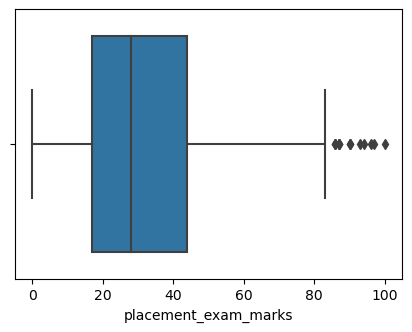

In [7]:
plt.figure(figsize=(5,3.5))
sns.boxplot(dataset['placement_exam_marks'])

In [8]:
# Finding the IQR
Quartile1 = dataset['placement_exam_marks'].quantile(0.25)
Quartile3 = dataset['placement_exam_marks'].quantile(0.75)
IQR = Quartile3 - Quartile1

In [9]:
upper_limit = Quartile3 + 1.5 * IQR
lower_limit = Quartile1 - 1.5 * IQR

In [10]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [11]:
dataset[dataset['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [12]:
dataset[dataset['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Removing Outliers

#### 1. Trimming

In [13]:
# Approach 1
new_dataset = dataset[dataset['placement_exam_marks'] < upper_limit]
new_dataset.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [14]:
new_dataset.shape

(985, 3)

#### Comparing data before and after removing outliers

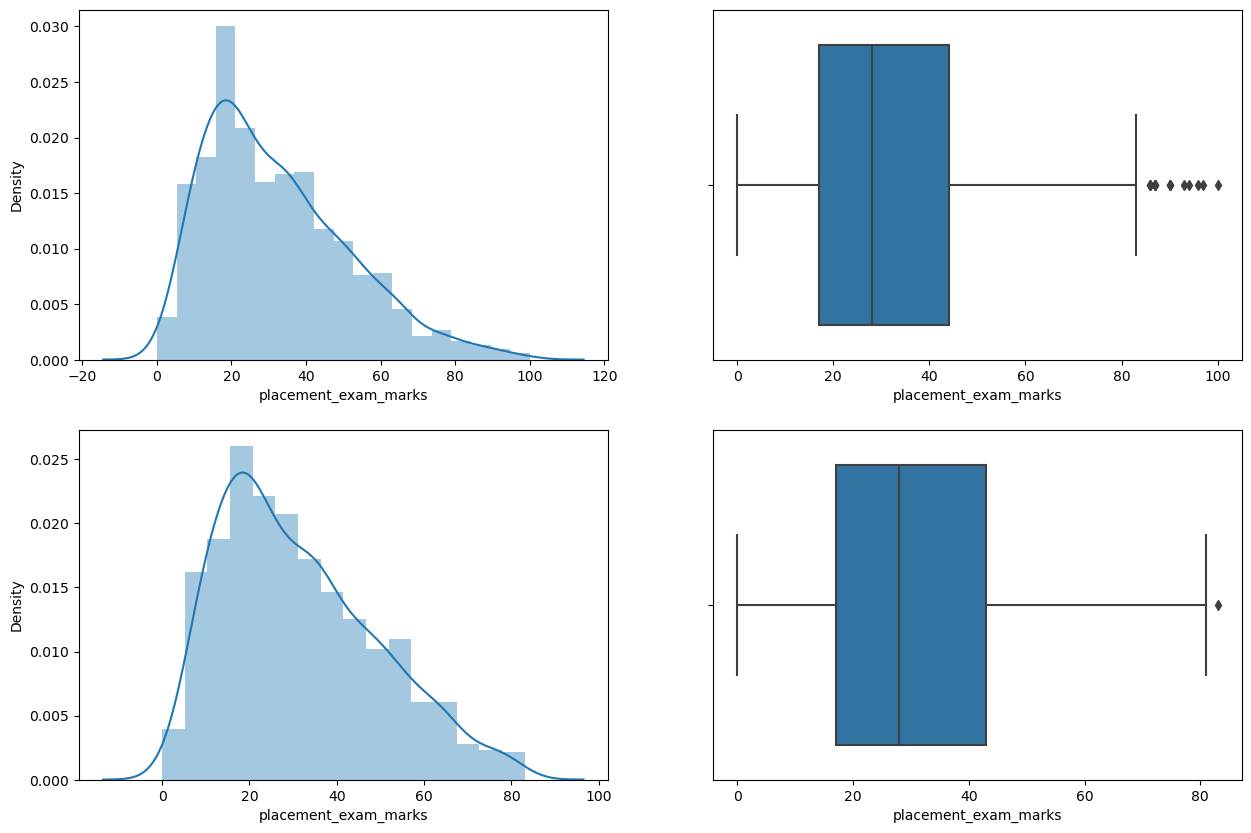

In [15]:
# Comparing

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(dataset['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(dataset['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_dataset['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_dataset['placement_exam_marks'])

plt.show()

#### 2. Capping

In [16]:
upper_limit = Quartile3 + 1.5 * IQR
lower_limit = Quartile1 - 1.5 * IQR

In [17]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [18]:
def limit(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [19]:
dataset['placement_exam_marks'] = dataset['placement_exam_marks'].apply(limit)

In [20]:
new_dataset2 = dataset[(dataset['placement_exam_marks'] < -23.5) & (dataset['placement_exam_marks'] > 84.5)]
new_dataset2
# As we can see there is no value in our age column now that is an outlier anymore so by capping we can replace the outliers and also not loose data

,cgpa,placement_exam_marks,placed


#### Data after performing outlier removal

In [21]:
dataset.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


<AxesSubplot:xlabel='placement_exam_marks'>

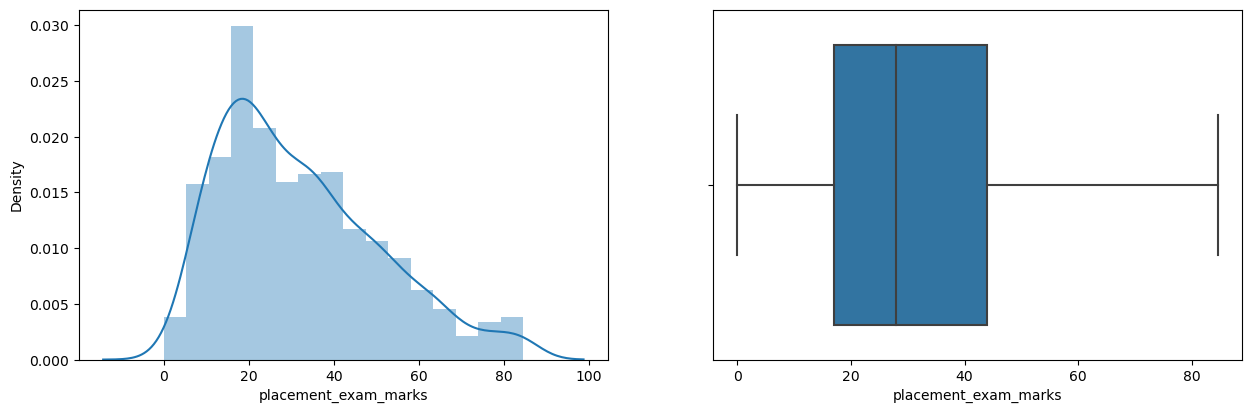

In [22]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(dataset['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(dataset['placement_exam_marks'])